Colour ℓ2-TV Denoising
======================

This example demonstrates the use of class [tvl2.TVL2Denoise](http://sporco.rtfd.org/en/latest/modules/sporco.admm.tvl2.html#sporco.admm.tvl2.TVL2Denoise) for removing Gaussian white noise from a colour image using Total Variation regularization with an ℓ2 data fidelity term (ℓ2-TV denoising).

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np

from sporco.admm import tvl2
from sporco import util
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

Load reference image.

In [2]:
img = util.ExampleImages().image('monarch.png', scaled=True,
                                 idxexp=np.s_[:,160:672])

Construct test image corrupted by Gaussian white noise with a 0.05 standard deviation.

In [3]:
np.random.seed(12345)
imgn = img + np.random.normal(0.0, 0.05, img.shape)

Set regularization parameter and options for ℓ2-TV denoising solver. The regularization parameter used here has been manually selected for good performance.

In [4]:
lmbda = 0.04
opt = tvl2.TVL2Denoise.Options({'Verbose': True, 'MaxMainIter': 200,
                'gEvalY': False, 'AutoRho': {'Enabled': True}})

Create solver object and solve, returning the the denoised image ``imgr``.

In [5]:
b = tvl2.TVL2Denoise(imgn, lmbda, opt)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ       
----------------------------------------------------------------


   0  2.34e+03  2.24e+02  5.29e+04  6.89e-01  4.23e-01  1.80e-01


   1  1.87e+03  6.80e+02  2.97e+04  3.08e-01  1.42e-01  1.80e-01


   2  1.82e+03  7.62e+02  2.64e+04  1.82e-01  1.06e-01  2.65e-01


   3  1.78e+03  7.98e+02  2.45e+04  1.13e-01  7.50e-02  3.48e-01


   4  1.76e+03  7.98e+02  2.41e+04  7.65e-02  5.77e-02  4.28e-01


   5  1.75e+03  8.00e+02  2.37e+04  5.40e-02  4.48e-02  4.92e-01


   6  1.74e+03  8.00e+02  2.36e+04  3.96e-02  3.44e-02  5.41e-01


   7  1.74e+03  8.01e+02  2.35e+04  2.99e-02  2.54e-02  5.41e-01


   8  1.74e+03  8.01e+02  2.34e+04  2.33e-02  1.86e-02  5.41e-01


   9  1.73e+03  8.02e+02  2.33e+04  1.84e-02  1.52e-02  6.04e-01


  10  1.73e+03  8.01e+02  2.33e+04  1.48e-02  1.34e-02  6.65e-01


  11  1.73e+03  8.01e+02  2.33e+04  1.20e-02  1.12e-02  6.65e-01


  12  1.73e+03  8.01e+02  2.33e+04  9.95e-03  9.07e-03  6.65e-01


  13  1.73e+03  8.01e+02  2.32e+04  8.33e-03  7.37e-03  6.65e-01


  14  1.73e+03  8.01e+02  2.32e+04  7.08e-03  6.03e-03  6.65e-01


  15  1.73e+03  8.01e+02  2.32e+04  6.11e-03  5.03e-03  6.65e-01


  16  1.73e+03  8.01e+02  2.32e+04  5.31e-03  4.51e-03  7.33e-01


  17  1.73e+03  8.01e+02  2.32e+04  4.67e-03  4.14e-03  7.33e-01


  18  1.73e+03  8.00e+02  2.32e+04  4.13e-03  3.60e-03  7.33e-01


  19  1.73e+03  8.00e+02  2.32e+04  3.69e-03  3.13e-03  7.33e-01


  20  1.73e+03  8.00e+02  2.32e+04  3.33e-03  2.74e-03  7.33e-01


  21  1.73e+03  8.00e+02  2.32e+04  3.01e-03  2.56e-03  8.08e-01


  22  1.73e+03  8.00e+02  2.32e+04  2.73e-03  2.44e-03  8.08e-01


  23  1.73e+03  8.00e+02  2.32e+04  2.50e-03  2.20e-03  8.08e-01


  24  1.73e+03  8.00e+02  2.32e+04  2.29e-03  1.97e-03  8.08e-01


  25  1.73e+03  8.00e+02  2.32e+04  2.11e-03  1.78e-03  8.08e-01


  26  1.73e+03  8.00e+02  2.32e+04  1.95e-03  1.59e-03  8.08e-01


  27  1.73e+03  8.00e+02  2.32e+04  1.81e-03  1.52e-03  8.95e-01


  28  1.73e+03  8.00e+02  2.32e+04  1.68e-03  1.49e-03  8.95e-01


  29  1.73e+03  8.00e+02  2.32e+04  1.57e-03  1.38e-03  8.95e-01


  30  1.73e+03  8.00e+02  2.32e+04  1.46e-03  1.27e-03  8.95e-01


  31  1.73e+03  8.00e+02  2.32e+04  1.37e-03  1.16e-03  8.95e-01


  32  1.73e+03  8.00e+02  2.32e+04  1.28e-03  1.06e-03  8.95e-01


  33  1.73e+03  8.00e+02  2.32e+04  1.20e-03  1.02e-03  9.82e-01


  34  1.73e+03  8.00e+02  2.32e+04  1.13e-03  1.00e-03  9.82e-01


  35  1.73e+03  8.00e+02  2.32e+04  1.06e-03  9.49e-04  9.82e-01


  36  1.73e+03  8.00e+02  2.32e+04  1.00e-03  8.73e-04  9.82e-01


  37  1.73e+03  8.00e+02  2.32e+04  9.49e-04  8.11e-04  9.82e-01
----------------------------------------------------------------


Display solve time and denoising performance.

In [6]:
print("TVL2Denoise solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL2Denoise solve time: 12.71 s
Noisy image PSNR:    25.96 dB
Denoised image PSNR: 33.10 dB


Display reference, corrupted, and denoised images.

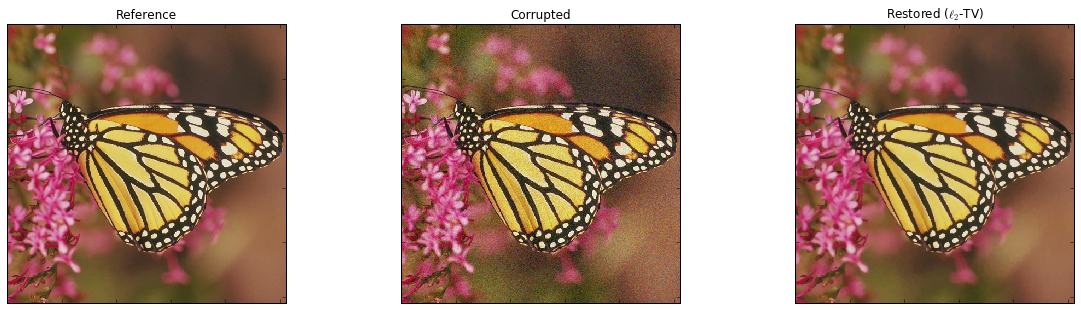

In [7]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_2$-TV)', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

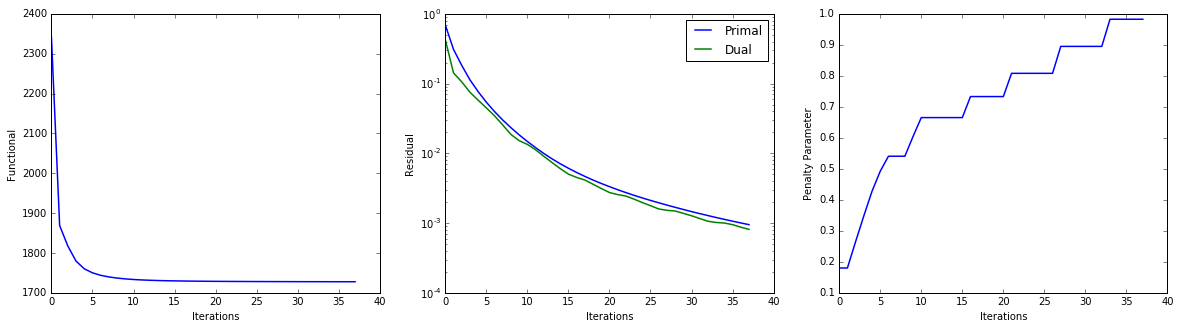

In [8]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T, ptyp='semilogy',
          xlbl='Iterations', ylbl='Residual', lgnd=['Primal', 'Dual'],
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()